In [34]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


# Exploratory Data Analysis (Tweepfake)

In [35]:
import os

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import nltk
nltk.download('stopwords')

from nltk.corpus import stopwords


ABSOLUTE_PATH="/content/drive/My Drive/deepfake_tweets"

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [36]:
train_set_path, val_set_path, test_set_path = (
    os.path.join(ABSOLUTE_PATH, "data/tweepfake_train.csv"),
    os.path.join(ABSOLUTE_PATH, "data/tweepfake_val.csv"),
    os.path.join(ABSOLUTE_PATH, "data/tweepfake_test.csv")
)

# Import split dataset
train_df, val_df, test_df = (
    pd.read_csv(train_set_path, sep=";"),
    pd.read_csv(val_set_path, sep=";"),
    pd.read_csv(test_set_path, sep=";")
)

# Concatenate split sets into a single DataFrame
df = pd.concat([train_df, val_df, test_df], ignore_index=True)

In [37]:
train_df.head(), val_df.head(), test_df.head()

(      screen_name                                               text  \
 0      imranyebot                             YEA now that note GOOD   
 1          zawvrk  Listen to This Charming Man by The Smiths  htt...   
 2        zawarbot  wish i can i would be seeing other hoes on the...   
 3  ahadsheriffbot  The decade in the significantly easier schedul...   
 4   kevinhookebot  "Theim class=\"alignnone size-full wp-image-60...   
 
   account.type class_type  
 0          bot     others  
 1        human      human  
 2          bot     others  
 3          bot     others  
 4          bot        rnn  ,
      screen_name                                               text  \
 0    ahadsheriff  TIGHT, TIGHT, TIGHT, YEAH!!! https://t.co/wj3n...   
 1   narendramodi  India has millennia old relations with Oman. W...   
 2          jaden                                  Anxious Teenagers   
 3  JustinTrudeau  Our top priority is keeping Canadians safe. Wi...   
 4     imranyebot  nah br

## Counting stopwords in text

In [38]:
stop_words = set(stopwords.words('english'))

def count_stopwords(df, text_column):
  """Counts the occurrences of stopwords in a given text column of a DataFrame.

  Args:
    df: The input DataFrame.
    text_column: The name of the text column to analyze.

  Returns:
    A dictionary where keys are stopwords and values are their counts.
  """
  stopword_counts = {}
  for _, row in df.iterrows():
    text = row[text_column].lower().split()  # Convert to lowercase and split into words

    for word in text:
      if word in stop_words:
        stopword_counts[word] = stopword_counts.get(word, 0) + 1

  return stopword_counts

df_stopword_counts = count_stopwords(df, 'text')
print("Stopword counts in the entire dataset:", df_stopword_counts)

train_stopword_counts = count_stopwords(train_df, 'text')
print("Stopword counts in training set:", train_stopword_counts)

val_stopword_counts = count_stopwords(val_df, 'text')
print("Stopword counts in validation set:", val_stopword_counts)

test_stopword_counts = count_stopwords(test_df, 'text')
print("Stopword counts in test set:", test_stopword_counts)

Stopword counts in the entire dataset: {'now': 630, 'that': 4109, 'to': 15647, 'this': 3482, 'by': 1136, 'the': 26856, 'i': 7296, 'can': 1362, 'be': 2816, 'other': 422, 'on': 4053, 'in': 6292, "don't": 382, 'more': 1067, 'what': 1009, 'are': 2491, 'of': 10869, 'had': 523, 'a': 11819, 'with': 3217, 'and': 10750, 'we': 1736, 'where': 300, 'an': 1570, 'our': 1387, 'for': 5802, 'while': 251, 'do': 1190, 'same': 299, 'as': 1735, 'not': 1807, 'is': 6103, 'up': 975, 'at': 1953, 'will': 1765, 'they': 1385, 'into': 471, 'but': 1518, 'should': 416, 'have': 2539, 'been': 858, 'so': 1458, 'about': 1222, 'or': 788, 'you': 4583, 'doing': 267, 'if': 1311, 'your': 1801, 'was': 1514, "i'm": 456, 'down': 260, 'my': 4104, 'both': 137, 'before': 275, 'after': 281, 'me': 1748, "it's": 604, 'just': 1355, 'from': 1498, 'here': 416, 'some': 1607, 'against': 163, 'their': 854, 'which': 384, 'his': 685, 'he': 765, 'all': 1665, 'once': 101, 'has': 1119, 'am': 324, 'there': 512, 'those': 291, 'who': 926, 'than': 

### Visualise stopword counts

In [39]:
def plot_stopword_counts(stopword_counts, title):
  """Plots the stopword counts as a bar chart."""
  sorted_counts = dict(sorted(stopword_counts.items(), key=lambda item: item[1], reverse=True))

  plt.figure(figsize=(10, 4))
  sns.barplot(x=list(sorted_counts.keys())[:20], y=list(sorted_counts.values())[:20])
  plt.xlabel("Stopwords")
  plt.ylabel("Counts")
  plt.title(title)
  plt.xticks(rotation=45, ha='right')
  plt.tight_layout()
  plt.show()

#### Full dataset

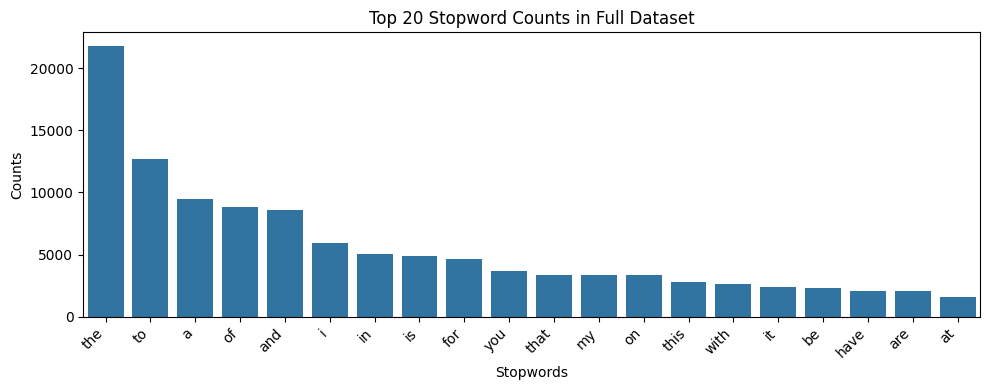

In [40]:
plot_stopword_counts(train_stopword_counts, "Top 20 Stopword Counts in Full Dataset")

#### Split datasets

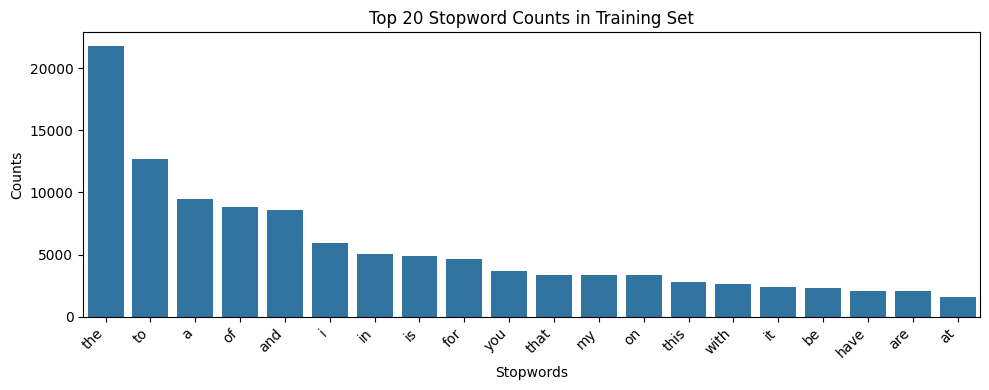

In [41]:
plot_stopword_counts(train_stopword_counts, "Top 20 Stopword Counts in Training Set")

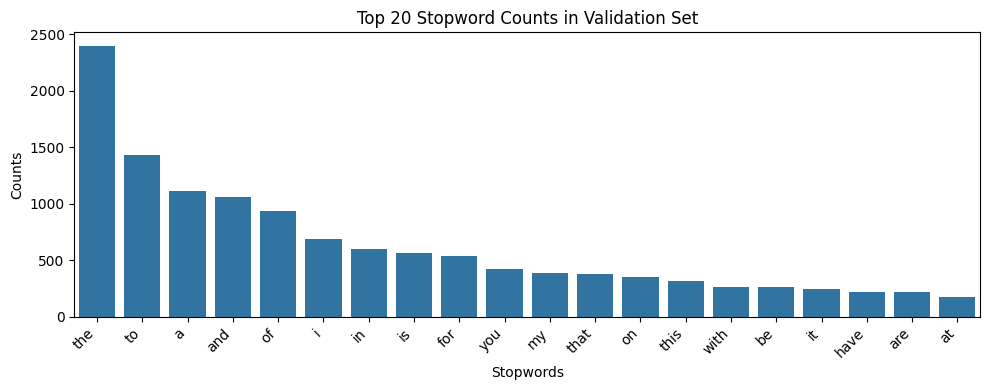

In [42]:
plot_stopword_counts(val_stopword_counts, "Top 20 Stopword Counts in Validation Set")

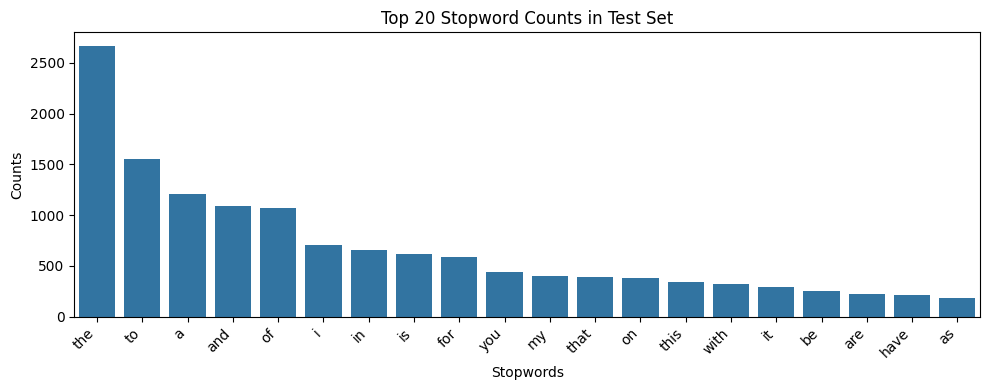

In [43]:
plot_stopword_counts(test_stopword_counts, "Top 20 Stopword Counts in Test Set")